In [113]:
%matplotlib inline

# Assignment 2

**DUE: Sunday October 24 at 11:59pm**

Turn in the assignment via Canvas.

To write legible answers you will need to be familiar with both [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) and [Latex](https://www.latex-tutorial.com/tutorials/amsmath/)

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Runtime→→Restart runtime) and then run all cells (in the menubar, select Runtime→→Run All).

Make sure you fill in any place that says "YOUR CODE HERE" or "YOUR ANSWER HERE", as well as your name below:

In [114]:
NAME = "Sanjay Shrikanth"
STUDENT_ID = "1718751"

## Problem 1 - Yield Dataset with Polynomial Regression

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

This dataset of size $n = 15$ contains measurements of yield from an experiment done at five different temperature levels. The variables are $y = yield$ and $x = temperature$ in degrees Fahrenheit. Download the data from PyDrive.

In [116]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [117]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [118]:
downloaded = drive.CreateFile({'id':"1snU4nKrW72fgaEYzWvnrK0iRhsVX2W7N"})
downloaded.GetContentFile('yield.csv')  

In [119]:
# Create pandas dataframe
data = pd.read_csv('yield.csv')

In [120]:
# Let's look at the data
data

,Temp,Yield
0,50,3.3
1,50,2.8
2,50,2.9
3,70,2.3
4,70,2.6
5,70,2.1
6,80,2.5
7,80,2.9
8,80,2.4
9,90,3.0


In [121]:
# Look at data description
data.describe()

,Temp,Yield
count,15.000000,15.000000
mean,78.000000,2.833333
std,17.808505,0.395811
min,50.000000,2.100000
25%,70.000000,2.550000
50%,80.000000,2.900000
75%,90.000000,3.050000
max,100.000000,3.500000


In [122]:
# Split data in X and y using pandas functionality.
X = data.iloc[:,0] # Create vector of explanatory variables
y = data.iloc[:,1] # Create vector of target variables

# Cast dataframes into numpy arrays
X = X.values
y = y.values

# Split data into X_train, Y_train, X_test y_test using sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

# Reshape X_train, X_test for sklearn LinearRegression
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

### a) Linear Regression (10 points)

We will run a simple linear regression on this well-curated dataset using sklearn's **LinearRegression**.

Hint: Review the sklearn docs https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html and class exercise.

In [123]:
from sklearn.linear_model import LinearRegression
# Instantiate LinearRegression
regressor = LinearRegression()

# Fit the regressor using X_train and y_train
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Let's now visually inspect the model and see how well this model predicts the yield. 
* First, plot the yield vs. temperature points from training set in black.
* Then, plot the regression line in red. Predictions from the regression model lie along the red line.

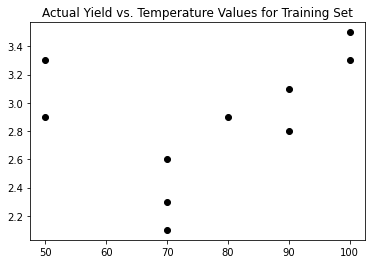

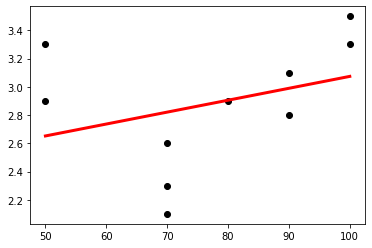

In [124]:
# Plot the actual yield (y_train) vs. temperature values from training set
plt.scatter(X_train, y_train, color='black')
plt.title('Actual Yield vs. Temperature Values for Training Set')
plt.show()

# Plot the regression line
min_X, max_X = (np.min(X_train), np.max(X_train))
lx = [min_X, max_X]
ly = [min_X*regressor.coef_ + regressor.intercept_, max_X*regressor.coef_ + regressor.intercept_]

plt.scatter(X_train, y_train, color='black')
plt.plot(lx, ly, color='red', linewidth=3)
plt.show()

Let's also visually inspect the prediction results from the test set.
* First, plot the yield vs. temperature points from the test set in black
* Then plot the regression line in red to see how prediction is similar to or different from the actual target.

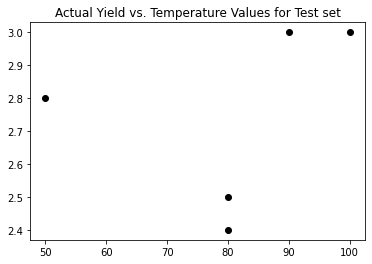

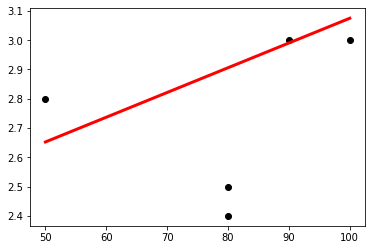

In [125]:
# Plot the actual yield (y_test) vs. temperature values  for the test set

plt.scatter(X_test, y_test, color='black')
plt.title('Actual Yield vs. Temperature Values for Test set')
plt.show()

# Plot the regression line
min_X, max_X = (np.min(X_test), np.max(X_test))
lx = [min_X, max_X]
ly = [min_X*regressor.coef_ + regressor.intercept_, max_X*regressor.coef_ + regressor.intercept_]

plt.scatter(X_test, y_test, color='black')
plt.plot(lx, ly, color='red', linewidth=3)
plt.show()

### b) Inspecting Linear Regression Model (5 points)

After inspecting the results visually, does this model appear to be a good or bad fit on the test set and training set? 

Visually, it appears that the model is a **bad** fit for the training set and the test set. In both cases, there seems to be high error on a fair number of data points, as there is a relatively large gap between the model's prediction of the yield versus the actual value. Since we want our model to minimize that error and encapsulate the trend of the dataset, this model is not good enough for predictive purposes.

Does the model display signs of underfitting? If so, why?

Yes, the model shows signs of underfitting because it does not accurately follow the trend of the dataset, which appears to be that of a higher polynomial order in contrast with our linear model. There is simply too much error between the datapoints and the model for it to be a proper fit as it generalizes the yield trend too much for it to be accurate, especially for the predictions of temperature = $80$ for example. Since the model cannot capture the trend of the data accurately, it shows signs of underfitting.

### c) Polynomial Regression (10 points)

Data may not follow a linear relationship from the independent variable $X$ to the dependent variable $y$. Fitting a linear model to this would be inaccurate and yield a high loss. 

If we want to model an order $d$ polynomial relationship between $X$ and $y$ we can augment our initial linear model where instead of having:
$$
y^{(i)} = \theta_0 + \theta_1 x^{(i)}
$$

We have:

$$
y^{(i)} = \theta_0 + \theta_1 x^{(i)} + \theta_2 {x^{(i)}}^2 + \cdots + \theta_d {x^{(i)}}^d
$$

We can use the same linear regression algorithm we if we first augment $X$ and add extra columns (or dimensions). 

$$ \textbf X =
\begin{bmatrix}
    x^{(1)}       & {x^{(1)}}^2 & \cdots & {x^{(1)}}^d \\
    x^{(2)}       & {x^{(2)}}^2 & \cdots & {x^{(2)}}^d \\
    \vdots       & \vdots & \ddots & \vdots \\
    x^{(n)}       & {x^{(n)}}^2 & \cdots & {x^{(n)}}^d
\end{bmatrix}$$

Then our new higher order $\hat Y$ is computed same as before.

$$ \hat Y =  X \theta =
\begin{bmatrix}
    1 & x^{(1)}       & {x^{(1)}}^2 & \cdots & {x^{(1)}}^d \\
    1 & x^{(2)}       & {x^{(2)}}^2 & \cdots & {x^{(2)}}^d \\
    \vdots & \vdots       & \vdots & \ddots & \vdots \\
    1 & x^{(n)}       & {x^{(n)}}^2 & \cdots & {x^{(n)}}^d
\end{bmatrix}
\begin{bmatrix}\theta_0 \\ \theta_1 \\ \vdots \\ \theta_{d} 
\end{bmatrix}=
\begin{bmatrix}
    \theta_0 + \theta_1 x^{(1)} + \theta_2 {x^{(1)}}^2 + \cdots + \theta_{d}  {x^{(1)}}^d \\
    \theta_0 + \theta_1 x^{(2)} + \theta_2 {x^{(2)}}^2 + \cdots + \theta_{d}  {x^{(2)}}^d  \\
    \vdots   \\
    \theta_0 + \theta_1 x^{(n)} + \theta_2 {x^{(n)}}^2 + \cdots + \theta_{d}  {x^{(n)}}^d
\end{bmatrix} 
= \begin{bmatrix}\hat y^{(1)} \\ \hat y^{(2)} \\ \vdots \\ \hat y^{(n)} 
\end{bmatrix}$$

Using sklearn's **PolynomialFeatures** functionality, we will now transform X_train and X_test into second order polynomial space.

For more info: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [126]:
# First, lets look at the values of X_train
print(X_train)

[[ 70]
 [ 50]
 [100]
 [ 90]
 [ 80]
 [ 90]
 [ 70]
 [ 50]
 [ 70]
 [100]]


In [127]:
from sklearn.preprocessing import PolynomialFeatures

# Creates polynomial transform of degree 2
poly = PolynomialFeatures(2)

# Transform X_train X_test
X_train_pol = poly.fit_transform(X_train)
X_test_pol = poly.fit_transform(X_test)

# Print X_train_pol
print(X_train_pol)

[[1.0e+00 7.0e+01 4.9e+03]
 [1.0e+00 5.0e+01 2.5e+03]
 [1.0e+00 1.0e+02 1.0e+04]
 [1.0e+00 9.0e+01 8.1e+03]
 [1.0e+00 8.0e+01 6.4e+03]
 [1.0e+00 9.0e+01 8.1e+03]
 [1.0e+00 7.0e+01 4.9e+03]
 [1.0e+00 5.0e+01 2.5e+03]
 [1.0e+00 7.0e+01 4.9e+03]
 [1.0e+00 1.0e+02 1.0e+04]]


We can now fit a second degree polynomial regression model to the transformed data.

In [128]:
from sklearn.linear_model import LinearRegression
# Instantiate LinearRegression
regressor = LinearRegression()

# Fit the regressor using X_train_pol and y_train
regressor.fit(X_train_pol, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now, visually inspect the polynomial regression model and see how well this model predicts the yield on the training set. 

Plot the yield vs. temperature points in black along with the polynomial regression line in red. Hint: For plotting the regression line, you can use the plot function to interpolate the regression line based on the model's prediction on data points.

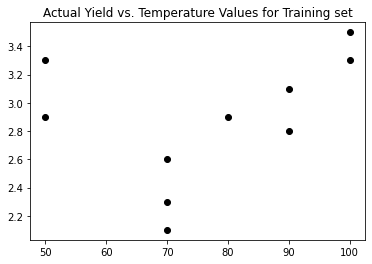

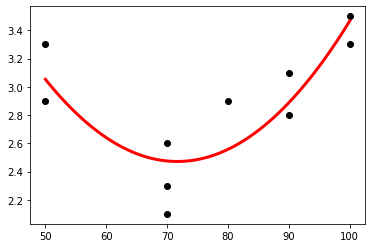

In [129]:
# Plot the actual yield (y_train) vs temp. values from training set
plt.scatter(X_train, y_train, color='black')
plt.title('Actual Yield vs. Temperature Values for Training set')
plt.show()

# Plot the regression line
plt.scatter(X_train, y_train, color='black')

X_t = np.linspace(np.min(X_train), np.max(X_train),100).reshape(-1,1)
X_train_pol2 = poly.fit_transform(X_t)
y_pred = regressor.predict(X_train_pol2).reshape(-1,1)

plt.plot(X_t, y_pred, color='red', linewidth=3)
plt.show()

Lastly, let's plot the test set yield vs. temperature points along with the polynomial regression line.

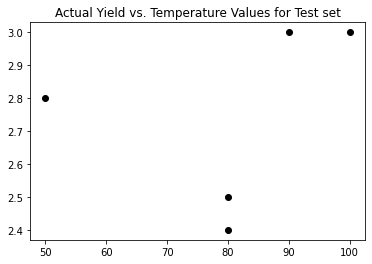

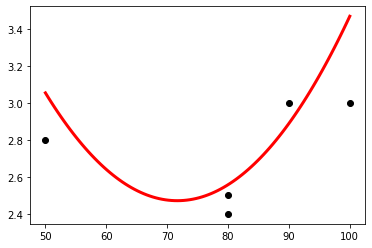

In [130]:
# Plot the actual yield (y_test) vs temp. values from test set
plt.scatter(X_test, y_test, color='black')
plt.title('Actual Yield vs. Temperature Values for Test set')
plt.show()

# Plot the regression line
plt.scatter(X_test, y_test, color='black')
X_te = np.linspace(np.min(X_test), np.max(X_test),100).reshape(-1,1)
X_test_pol2 = poly.fit_transform(X_te)
y_pred = regressor.predict(X_test_pol2).reshape(-1,1)

plt.plot(X_te, y_pred, color='red', linewidth=3)
plt.show()

### d) Inpsecting Polynomial Regression Model (5 points)

After inspecting the polynomial regression model, does the model appear to be a better fit than simple linear regression? 

**Yes**, the polynomal regression model appears to be a much better fit than the linear model, as it now follows the overall trend of the data much closer than the linear model. Using the predictions of the polynomial features allow the model to predict values more closer to the trend of the graph, making it a better representation of the dataset. 

Does the model address display more or less underfitting than the simple linear regression model and why?

This model shows **less** underfitting because visually, the overall error between the data points and the regression line predictions are much less than the linear model, which makes it a better fit. The model generalizes less than the linear model, which lowers the degree of underfitting it displays. 


## Problem 2 - Fish Dataset

## Importing the Dataset

We will now perform different variations of linear regression to predict fish weight given species type, weight, and physical measurements. The different attributes of the data are:

- Species: species name of fish

- Weight: weight of fish in Gram (g)

- Length1: vertical length in (cm)

- Length2: diagonal length in (cm)

- Length3: cross length in (cm)

- Height: height in (cm)

- Width: diagonal width in (cm)

Begin by downloading the Fish.csv file from google drive. Make sure to select your @ucsc.edu email when authorizing access to your account. 

In [131]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [132]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [133]:
# Download the Fish data
downloaded = drive.CreateFile({'id':"1AtMi-xCejVlhYS5qjgjjW4gH-TLuWJjC"})
downloaded.GetContentFile('Fish.csv')  

In [134]:
# Create pandas dataframe
fish_data = pd.read_csv('Fish.csv')

Let's look at some of the data and check some of the dataset descriptors.

In [135]:
# Let's print out the first few rows
fish_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [136]:
# Let's get the data shape
fish_data.shape

(159, 7)

In [137]:
# Let's describe the data
fish_data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [138]:
# Lastly, let's get data info
fish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


### a) Removing 0's from data (5 points)

We can see that there aren't any null values in this dataset by using the .info() function. However, .describe() shows us there are weights of 0.0g which is ambiguous and is likely a recording error. 

Drop any row that has a weight of 0.0.

In [139]:
# Delete any rows for which there is a measurement of 0.0 for weight.
indexes = fish_data[fish_data['Weight'] == 0.0].index
fish_data.drop(indexes, inplace = True)

# Let's take another look.
fish_data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,400.847468,26.293038,28.465823,31.280380,8.986790,4.424232
std,357.697796,10.011427,10.731707,11.627605,4.295191,1.689010
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,121.250000,19.150000,21.000000,23.200000,5.940600,3.398650
50%,281.500000,25.300000,27.400000,29.700000,7.789000,4.277050
75%,650.000000,32.700000,35.750000,39.675000,12.371850,5.586750
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


### b) Outlier Detection \& Elimination (5 points)

Using 4 standard deviations from the mean as our cut-off, and using the data listed using the describe function above, are there any outliers?

In [140]:
labels = fish_data.columns.values.tolist()
for l in labels:
  if l == 'Species': continue
  fish_data['Zscore'] = (fish_data[l] - fish_data[l].mean()) / fish_data[l].std()
  indices = fish_data[(fish_data['Zscore'] > 4) | (fish_data['Zscore'] < -4)].index
  fish_data.drop(indices, inplace = True)
  fish_data = fish_data.drop(columns=["Zscore"])

  z_score_min = (fish_data[l].min() - fish_data[l].mean()) / fish_data[l].std()
  z_score_max = (fish_data[l].max() - fish_data[l].mean()) / fish_data[l].std()
  print(l, z_score_min, z_score_max)

fish_data.describe()

Weight -1.1041372724300456 3.492200810621435
Length1 -1.877158704842668 3.2669629336932795
Length2 -1.8697699869745301 3.2552303873658257
Length3 -1.9333628182239988 3.15796927348466
Height -1.689887556103412 2.321249522067108
Width -1.9991782799617972 2.2011526646261443


,Weight,Length1,Length2,Length3,Height,Width
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,400.847468,26.293038,28.465823,31.280380,8.986790,4.424232
std,357.697796,10.011427,10.731707,11.627605,4.295191,1.689010
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,121.250000,19.150000,21.000000,23.200000,5.940600,3.398650
50%,281.500000,25.300000,27.400000,29.700000,7.789000,4.277050
75%,650.000000,32.700000,35.750000,39.675000,12.371850,5.586750
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


Looking at the ```describe()``` output after the outlier elimination procedure, the total count of each of the quantitative categories remained the same at $158$ samples each. This implies that there are **no outliers** in the dataset that exceed $4$ standard deviations from the mean. This is consistent with the z-scores of the min and max values of each label. Since the min and the max values are the farthest data from the mean in the dataset and that none of them are $4$ standard devations from the mean (z-scores $< -4$ or $> 4$), there are **no** outliers in this dataset.

## Problem 3 - Fish Linear Regression

You will now run different versions of linear regression in order to predict fish Weight using the 6 explanatory variables.

### a) Multiple Linear Regression (6 points)

First, run a multiple linear regression using only the height, width, and length measurements to predict weight. We will begin by splitting the data into features **X_fish** and target variable **y_fish**.

In [141]:
y_fish = fish_data.iloc[:, 1] # Get Fish Weights
X_fish = fish_data.drop(columns=['Weight']) # Get Fish measurements plus species
X_fish = X_fish.drop(columns=['Species']) # Drop the Fish Species for now

# Print X.head(), you should have 5 features for each sample
print("X_fish.head():")
print(X_fish.head())

# Print y.head(), you should have one label for each sample
print("\ny_fish.head()")
print(y_fish.head())

X_fish.head():
   Length1  Length2  Length3   Height   Width
0     23.2     25.4     30.0  11.5200  4.0200
1     24.0     26.3     31.2  12.4800  4.3056
2     23.9     26.5     31.1  12.3778  4.6961
3     26.3     29.0     33.5  12.7300  4.4555
4     26.5     29.0     34.0  12.4440  5.1340

y_fish.head()
0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64


Now, we are almost ready to run regression with scikit-learn. We need to first convert **X_fish** and **y_fish** into numpy arrays and split the data into training and validation splits using sklearn **train_test_split**. 

sklearn's train_test_split offers customizable functionality when creating training and test sets. For more information, checkout https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html .

In [142]:
# Convert X, and y into np arrays
X_fish = X_fish.values
y_fish = y_fish.values

# Split data into train test split
from sklearn.model_selection import train_test_split
X_fish_train, X_fish_test, y_fish_train, y_fish_test = train_test_split(X_fish, y_fish, test_size = 0.2, random_state = 0)

Now we are ready to run a multiple linear regression. Use sklearn's **LinearRegression** to carry out the regression.

In [143]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

# Fit the regressor using X_fish_train and y_fish_train
regressor.fit(X_fish_train, y_fish_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now let's see how we did and generate predictions for X_fish_test. Then print predicted values and actual target values side-by-side for a visual comparison.

In [144]:
# Generate predictions using X_fish_test
y_fish_pred = regressor.predict(X_fish_test)

# Print the predictions along with actual weights
for pred in range(len(y_fish_pred)):
  print("Prediction: {}  ".format(y_fish_pred[pred]), "Actual: {}\n".format(y_fish_test[pred]))

print("\nPredictions", y_fish_pred)
print("\nActual Weights", y_fish_test)

Prediction: 476.59117882312404   Actual: 390.0

Prediction: 207.9929561343152   Actual: 160.0

Prediction: 696.6127779796425   Actual: 700.0

Prediction: 829.8356241968238   Actual: 1015.0

Prediction: 155.66081610908913   Actual: 120.0

Prediction: 839.4307731235608   Actual: 1100.0

Prediction: 756.424542188638   Actual: 820.0

Prediction: 860.905384602052   Actual: 950.0

Prediction: 648.0651893666604   Actual: 556.0

Prediction: 194.36935616522538   Actual: 145.0

Prediction: 656.331155933801   Actual: 700.0

Prediction: 988.3533044034305   Actual: 1600.0

Prediction: 694.4190899537587   Actual: 720.0

Prediction: 27.973156471368043   Actual: 55.0

Prediction: 90.40492060661057   Actual: 85.0

Prediction: 279.88428527811044   Actual: 188.0

Prediction: 426.51714490590535   Actual: 300.0

Prediction: 253.2749712393799   Actual: 180.0

Prediction: 988.3533044034305   Actual: 1550.0

Prediction: 380.413825535969   Actual: 306.0

Prediction: 203.77329399786714   Actual: 140.0

Predicti

### b) Computing MSE and R-squared for MLR (5 points)

The model appears to do an okay job predicting some weights while missing the mark on others. Let's quantify the results by computing mean squared error (MSE) and the coefficient of determination (R-squared). sklearn's metrics package provides functions to compute the values for you. 

More info can be found here: 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

In [145]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Compute the mean squared error using y_fish_test and y_fish_pred
mse = mean_squared_error(y_fish_test, y_fish_pred)
print("MSE: ", mse)

# Compute the coefficient of determination using y_fish_test and y_fish_pred
r_2 = r2_score(y_fish_test, y_fish_pred)
print("R-Squared: ", r_2)

MSE:  31561.773067541344
R-Squared:  0.8245122776931352


Using the y_fish_test and y_fish_pred, what was the mean squared error for this model?

Mean Squared Error of the model is $31561.773067541344$

Using the y_fish_test and y_fish_pred, what was the coefficient of detemination for this model?

Coefficient of Determination for the model is $0.8245122776931352$

### c) Polynomial Multiple Linear Regression (12 points)

We have seen how polynomial regression can increase the predictive power of linear regression models. We will now run a polynomial multiple linear regression model in order to gain a more accurate model. Begin by transforming the features X_fish_test and X_fish_train into second order polynomial space. There will be interaction terms in the transformed dataset as well. For more on interaction terms visit the sklearn docs.

In [146]:
from sklearn.preprocessing import PolynomialFeatures
# Create polynomial transform of degree 2. hint: problem 1
poly = PolynomialFeatures(2)

# Transform X_fish_train X_fish_test to second order polynomial space
X_fish_train_pol = poly.fit_transform(X_fish_train)
X_fish_test_pol = poly.fit_transform(X_fish_test)

# Print 5 rows of X_fish_train_poly, shape should be (5,21)
first_five_rows = X_fish_train_pol[:5,:]
print(first_five_rows)
print("Shape:", first_five_rows.shape)

[[1.00000000e+00 3.04000000e+01 3.30000000e+01 3.83000000e+01
  1.48604000e+01 5.28540000e+00 9.24160000e+02 1.00320000e+03
  1.16432000e+03 4.51756160e+02 1.60676160e+02 1.08900000e+03
  1.26390000e+03 4.90393200e+02 1.74418200e+02 1.46689000e+03
  5.69153320e+02 2.02430820e+02 2.20831488e+02 7.85431582e+01
  2.79354532e+01]
 [1.00000000e+00 3.48000000e+01 3.73000000e+01 3.98000000e+01
  6.28840000e+00 4.01980000e+00 1.21104000e+03 1.29804000e+03
  1.38504000e+03 2.18836320e+02 1.39889040e+02 1.39129000e+03
  1.48454000e+03 2.34557320e+02 1.49938540e+02 1.58404000e+03
  2.50278320e+02 1.59988040e+02 3.95439746e+01 2.52781103e+01
  1.61587920e+01]
 [1.00000000e+00 4.00000000e+01 4.25000000e+01 4.55000000e+01
  6.82500000e+00 4.45900000e+00 1.60000000e+03 1.70000000e+03
  1.82000000e+03 2.73000000e+02 1.78360000e+02 1.80625000e+03
  1.93375000e+03 2.90062500e+02 1.89507500e+02 2.07025000e+03
  3.10537500e+02 2.02884500e+02 4.65806250e+01 3.04326750e+01
  1.98826810e+01]
 [1.00000000e+00

Next run the second order polynomial regression using the transformed data. Instantiate a new regression model and use X_fish_train_pol and y_fish_train to fit the model.

In [147]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

# Fit the regressor using X_fish_train_pol and y_fish_train
regressor.fit(X_fish_train_pol, y_fish_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now let's see how we did with the second model and generate predictions using X_fish_test_pol. Then print predicted values and actual target values side-by-side for a visual comparison.

In [148]:
# generate predictions using X_test
y_fish_pol_pred = regressor.predict(X_fish_test_pol)

print(len(y_fish_pol_pred))
print(y_fish_test.shape)

# Print the predictions along with actual weights
for pred in range(len(y_fish_pol_pred)):
  print("Prediction: {}  ".format(y_fish_pol_pred[pred]), "Actual: {}\n".format(y_fish_test[pred]))

print("\nPredictions", y_fish_pol_pred)
print("\nActual Weights", y_fish_test)

32
(32,)
Prediction: 410.78161734301136   Actual: 390.0

Prediction: 144.99000843058303   Actual: 160.0

Prediction: 661.089946181627   Actual: 700.0

Prediction: 916.2093863540133   Actual: 1015.0

Prediction: 120.28326145947882   Actual: 120.0

Prediction: 892.2945253778526   Actual: 1100.0

Prediction: 779.3303627505259   Actual: 820.0

Prediction: 970.5137205767612   Actual: 950.0

Prediction: 613.9718885345383   Actual: 556.0

Prediction: 138.75685094718818   Actual: 145.0

Prediction: 702.9669446833261   Actual: 700.0

Prediction: 1200.8808098546551   Actual: 1600.0

Prediction: 736.0196461334101   Actual: 720.0

Prediction: 68.24127115648642   Actual: 55.0

Prediction: 65.41870350931529   Actual: 85.0

Prediction: 204.0671725829381   Actual: 188.0

Prediction: 348.32997005294754   Actual: 300.0

Prediction: 164.86007087658058   Actual: 180.0

Prediction: 1200.8808098546551   Actual: 1550.0

Prediction: 301.29364675643876   Actual: 306.0

Prediction: 132.03878287234969   Actual: 

### d) Computing MSE and R-squared for Polynomial Regression (5 points)

Now, compute the MSE and R-squared using y_fish_test and y_fish_pol_pred

In [149]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Compute the mean squared error using y_fish_test and y_fish_pol_pred
mse_poly = mean_squared_error(y_fish_test, y_fish_pol_pred)
print("MSE: ", mse_poly)

# Compute the coefficient of determination using y_fish_test and y_fish_pol_pred
r_2_poly = r2_score(y_fish_test, y_fish_pol_pred)
print("R-Squared: ", r_2_poly)


MSE:  12552.64579521197
R-Squared:  0.9302055934939845


Using the y_fish_test and y_fish_pol_pred, what was the mean squared error for this model?

Mean Square Error is: $12552.64579521197$

Using the y_fish_test and y_fish_pol_pred, what was the coefficient of detemination for this model?

Coefficient of Determination is: $0.9302055934939845$

### e) Multiple Linear Regression With Categorical Variable (12 points)

Now that we have done multiple linear regression, and polynomial multiple linear regression, we will now do a multiple linear regression that takes into account the species of fish by creating numeric levels.

In [150]:
# Create a copy of fish_data
fish_data_species = fish_data

# Begin by generating a dictionary that maps all unique species in fish_data to a unique id
level_dict = {species_name:i for i, species_name in enumerate(fish_data_species['Species'].unique())}

# Uses the level dictionary to retrieve the id
def integer_encode_level(level):
    return level_dict[level]

# Apply the function to the Species column and store in Species column (you should overwrite the species current data with the numeric representations)
fish_data_species['Species'] = fish_data_species['Species'].apply(integer_encode_level)

# Check data
fish_data_species

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,6,12.2,11.5,12.2,13.4,2.0904,1.3936
155,6,13.4,11.7,12.4,13.5,2.4300,1.2690
156,6,12.2,12.1,13.0,13.8,2.2770,1.2558
157,6,19.7,13.2,14.3,15.2,2.8728,2.0672


We will now create a dataset with 1 target column and 6 feature columns: Species, Length1, Length2, Length3, Height, Width. 

In [151]:
# Split fish_data into 
y_fish_categorical = fish_data_species.iloc[:, 1] # Get Fish Weights
X_fish_categorical = fish_data_species.drop(columns=['Weight']) # Get Fish measurements plus species

# Print X_fish_categorical.head(), you should have 6 features for each sample
print("X_fish_categorical.head():")
print(X_fish_categorical.head())

# Print y_fish_categorical.head(), you should have one label for each sample
print("\ny_fish_categorical.head()")
print(y_fish_categorical.head())

X_fish_categorical.head():
   Species  Length1  Length2  Length3   Height   Width
0        0     23.2     25.4     30.0  11.5200  4.0200
1        0     24.0     26.3     31.2  12.4800  4.3056
2        0     23.9     26.5     31.1  12.3778  4.6961
3        0     26.3     29.0     33.5  12.7300  4.4555
4        0     26.5     29.0     34.0  12.4440  5.1340

y_fish_categorical.head()
0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64


Create training and test sets for the fish data with categorical species variable:

In [152]:
# Convert X, and y into np arrays
X_fish_categorical = X_fish_categorical.values
y_fish_categorical = y_fish_categorical.values

# Split data into train test split
from sklearn.model_selection import train_test_split
X_fish_train_categorical, X_fish_test_categorical, y_fish_train_categorical, y_fish_test_categorical = train_test_split(X_fish_categorical, y_fish_categorical, test_size = 0.2, random_state = 0)

Now we are ready to run a our final multiple linear regression. As a recap, we added a categorical variable to represent the species of fish. We encoded the species as levels, and overwrote the species column with the numeric representations of the species. Now, use sklearn's **LinearRegression** to carry out regression one last time.

In [153]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

# Fit the regressor using X_fish_train_categorical and y_fish_train_categorical
regressor.fit(X_fish_train_categorical, y_fish_train_categorical)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Let's check the predictions for this model and generate predictions using X_fish_test_categorical. Then print target and estimated weight values side-by-side.

In [154]:
# generate predictions using X_fish_test_categorical
y_fish_pred_categorical = regressor.predict(X_fish_test_categorical)


# Print the predictions along with actual weights
for pred in range(len(y_fish_pred_categorical)):
  print("Prediction: {}  ".format(y_fish_pred_categorical[pred]), "Actual: {}\n".format(y_fish_test[pred]))

print("\nPredictions", y_fish_pred_categorical)
print("\nActual Weights", y_fish_test)

Prediction: 462.4162250426443   Actual: 390.0

Prediction: 140.46342332395182   Actual: 160.0

Prediction: 707.8190370938321   Actual: 700.0

Prediction: 871.1228324376716   Actual: 1015.0

Prediction: 143.05409674330986   Actual: 120.0

Prediction: 843.1293791398471   Actual: 1100.0

Prediction: 769.5775194426856   Actual: 820.0

Prediction: 868.4968023862289   Actual: 950.0

Prediction: 666.5983991340822   Actual: 556.0

Prediction: 194.15313937916403   Actual: 145.0

Prediction: 672.8149122816362   Actual: 700.0

Prediction: 960.513302420276   Actual: 1600.0

Prediction: 736.9098617610275   Actual: 720.0

Prediction: -2.954443624019632   Actual: 55.0

Prediction: 41.01945185685054   Actual: 85.0

Prediction: 284.75537217699593   Actual: 188.0

Prediction: 561.7345642602932   Actual: 300.0

Prediction: 224.7491460051964   Actual: 180.0

Prediction: 960.513302420276   Actual: 1550.0

Prediction: 350.8427264339243   Actual: 306.0

Prediction: 72.0250698527093   Actual: 140.0

Predictio

### f) Computing MSE and R-squared for MLR with Categorical Variable (5 points)

In [155]:
# Compute the mean squared error using y_fish_test_categorical and y_fish_pred_categorical
mse_cat = mean_squared_error(y_fish_test_categorical, y_fish_pred_categorical)
print("MSE: ", mse_cat)

# Compute the coefficient of determination using y_fish_test_categorical and y_fish_pred_categorical
r_2_cat = r2_score(y_fish_test_categorical, y_fish_pred_categorical)
print("R-Squared: ", r_2_cat)

MSE:  34678.46536821308
R-Squared:  0.807183047430761


Using y_fish_test_categorical and y_fish_pred_categorical, what was the mean squared error for this model?

Mean squared error is $34678.46536821308$


Using y_fish_test_categorical and y_fish_pred_categorical, what was the coefficient of detemination for this model?

Coefficient of Determination is $0.807183047430761$

### g) Researching for the Best Model (15 points)

Read [this](https://www.datarobot.com/blog/regularized-linear-regression-with-scikit-learn/) tutorial to see how you can control the degree of the polynomial and train a **Regularized** linear regression model.

In the cell below, investigate and show your observations on:
1. Which features are important?
2. What polynomial order is appropriate for the model to have an appropriate fit (no overfitting or underfitting)?
3. The impact of regularization (L2 norm or L1 norm) and the regularizer factor/parameter on model's generalization capability.
4. Finally, report your best model (including model's cost function, regularizer, regularizer factor, and polynomial order) along with a plot of model's performance on the training data and test data. We expect this model to perform better than all prior models you trained.

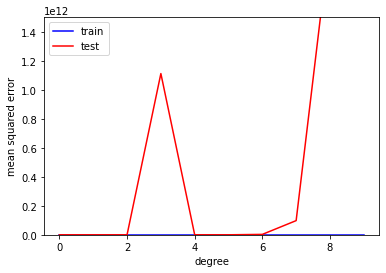

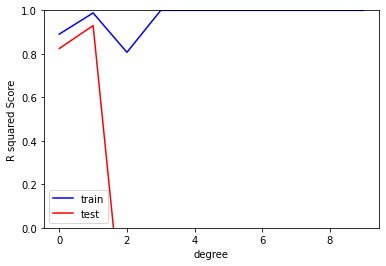

Mean Squared Error for testing data (no regularization) 
 [3.15617731e+04 1.25526458e+04 2.90441682e+05 1.11227736e+12
 5.08048817e+07 3.68500106e+07 2.84407987e+09 9.78391078e+10
 2.05072210e+12 3.95275455e+13]
Model with the least MSE is of degree: 2 with MSE = 12552.64579521197
Model with the largest r2 score is of degree: 2 with r2 = 0.9302055934939845

###################
Regularization using L2 Norm (RIDGE): 
Train MSE:  [1288.93159472 1288.94194092 1288.96922283 1289.00941677 1289.05977661
 1289.11829038 1289.18341975 1289.25395608 1289.3289315  1289.40756026
 1289.48919738 1289.57330898 1289.65945    1289.74724719 1289.83638577
 1289.92659939 1290.01766121 1290.10937802 1290.20158433 1290.2941381
 1290.38691687 1290.47981542 1290.57274252 1290.66561947 1290.75837781
 1290.85095828 1290.94330935 1291.03538638 1291.1271504  1291.21856766
 1291.30960884 1291.40024844 1291.49046437 1291.58023758 1291.66955161
 1291.75839216 1291.84674717 1291.93460631 1292.02196073 1292.10880316
 1

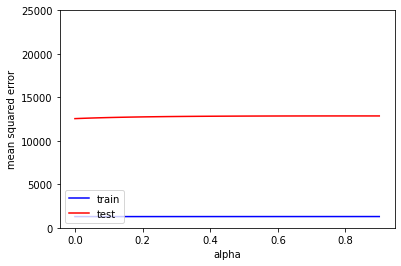



Train R-Squared:  [0.98825332 0.98825323 0.98825298 0.98825261 0.98825215 0.98825162
 0.98825103 0.98825038 0.9882497  0.98824898 0.98824824 0.98824747
 0.98824669 0.98824589 0.98824508 0.98824425 0.98824342 0.98824259
 0.98824175 0.9882409  0.98824006 0.98823921 0.98823836 0.98823752
 0.98823667 0.98823583 0.98823499 0.98823415 0.98823331 0.98823248
 0.98823165 0.98823082 0.98823    0.98822918 0.98822837 0.98822756
 0.98822675 0.98822595 0.98822516 0.98822437 0.98822358 0.9882228
 0.98822202 0.98822125 0.98822048 0.98821972 0.98821896 0.98821821
 0.98821746 0.98821672 0.98821598 0.98821524 0.98821452 0.98821379
 0.98821307 0.98821236 0.98821165 0.98821095 0.98821025 0.98820955
 0.98820886 0.98820817 0.98820749 0.98820682 0.98820614 0.98820548
 0.98820481 0.98820415 0.9882035  0.98820285]
Test R-Squared:  [0.93020559 0.93009573 0.92999298 0.92989675 0.9298066  0.92972213
 0.92964296 0.92956877 0.92949922 0.929434   0.92937283 0.92931544
 0.92926158 0.92921102 0.92916354 0.92911894 0.

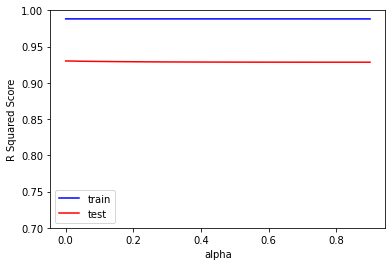

Alpha with the least MSE is: 1e-08 
      MSE = 12552.645781135749 
      r2 = 0.9302055935722502
Improvement in MSE (new - old) is:  -1.4076222214498557e-05
Improvement in r2 Score (new - old) is:  7.826572723246272e-11
###################

Regularization using L1 Norm (LASSO): 
Train MSE:  [1366.65934639 1366.65706476 1366.65478643 1366.65251139 1366.65023957
 1366.64797109 1366.64570591 1366.64344402 1366.64118541 1366.6389301
 1366.63667808 1366.63442935 1366.63218392 1366.62994157 1366.62770269
 1366.62546711 1366.62324797 1366.62102854 1366.61880417 1366.61658309
 1366.6143653  1366.61215081 1366.6099396  1366.60773169 1366.60552706
 1366.60332527 1366.60112721 1366.59893244 1366.59674097 1366.59455278
 1366.59236789 1366.59018628 1366.58800797 1366.58583295 1366.58366122
 1366.58149278 1366.57932763 1366.57716577 1366.57500661 1366.57290238
 1366.5707527  1366.56860533 1366.56646124 1366.56432045 1366.56218295
 1366.56004874 1366.55791782 1366.55578934 1366.55366498 1366.5515439

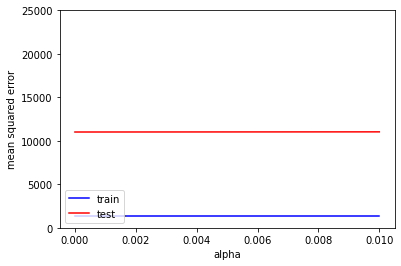



Train R-Squared:  [0.98754495 0.98754497 0.98754499 0.98754501 0.98754503 0.98754505
 0.98754507 0.98754509 0.98754511 0.98754514 0.98754516 0.98754518
 0.9875452  0.98754522 0.98754524 0.98754526 0.98754528 0.9875453
 0.98754532 0.98754534 0.98754536 0.98754538 0.9875454  0.98754542
 0.98754544 0.98754546 0.98754548 0.9875455  0.98754552 0.98754554
 0.98754556 0.98754558 0.9875456  0.98754562 0.98754564 0.98754566
 0.98754568 0.9875457  0.98754572 0.98754574 0.98754576 0.98754578
 0.9875458  0.98754582 0.98754583 0.98754585 0.98754587 0.98754589
 0.98754591 0.98754593 0.98754595 0.98754597 0.98754599 0.98754601
 0.98754603 0.98754605 0.98754607 0.98754609 0.9875461  0.98754612
 0.98754614 0.98754616 0.98754618 0.9875462  0.98754622 0.98754624
 0.98754625 0.98754627 0.98754629 0.98754631]
Test R-Squared:  [0.93876417 0.93876276 0.93876134 0.93875993 0.93875851 0.9387571
 0.93875568 0.93875427 0.93875285 0.93875144 0.93875002 0.93874861
 0.9387472  0.93874578 0.93874437 0.93874295 0.9

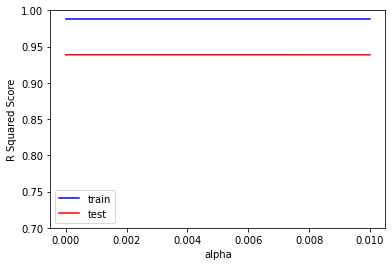

Alpha with the least MSE is: 1e-07 
      MSE = 11013.370888397392 
      r2 = 0.9387641699346345
Improvement in MSE (new - old) is:  -1539.2749068145786
Improvement in r2 Score (new - old) is:  0.008558576440650056
###################
Lasso (L1 Norm) outputs the lowest MSE.

Best Model:
Cost (MSE) = 11013.370888397392, Regularizer = L1 Norm, Regularizer factor = 1e-07, Polynomial Order = 2

Feature Weights after L1 Norm Regularization:
Length1: 49.08390481931572
Length2: -18.11517039070464
Length3: -12.453234121195745
Height: 20.973878061157002
Width: 61.444343905857544


In [156]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso, Ridge
import warnings
warnings.filterwarnings("ignore")

## PART 2: FINDING OPTIMAL POLYNOMIAL DEGREE
train_error = np.empty(10)
test_error = np.empty(10)
train_r2 = np.empty(10)
test_r2 = np.empty(10)
for degree in range(10):
  reg = make_pipeline(PolynomialFeatures(degree + 1), LinearRegression())
  reg.fit(X_fish_train, y_fish_train)
  y_pred_train = reg.predict(X_fish_train)
  y_pred_test = reg.predict(X_fish_test)
  train_error[degree] = mean_squared_error(y_fish_train, y_pred_train)
  test_error[degree] = mean_squared_error(y_fish_test, y_pred_test)
  train_r2[degree] = r2_score(y_fish_train, y_pred_train)
  test_r2[degree] = r2_score(y_fish_test, y_pred_test)

plt.plot(np.arange(10), train_error, color='blue', label='train')
plt.plot(np.arange(10), test_error, color='red', label='test')
plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='upper left')
plt.ylim((-1.0e6, 1.5e12))
plt.show()

plt.plot(np.arange(10), train_r2, color='blue', label='train')
plt.plot(np.arange(10), test_r2, color='red', label='test')
plt.ylabel('R squared Score')
plt.xlabel('degree')
plt.legend(loc='lower left')
plt.ylim((0, 1))
plt.show()

print("Mean Squared Error for testing data (no regularization) \n", test_error)

## increment by 1 to account for how I indexed the mse arrays
min_arg = np.argmin(test_error)
mse_no_reg = test_error[min_arg]
print("Model with the least MSE is of degree: {} with MSE = {}".format(min_arg + 1, mse_no_reg))
max_arg = np.argmax(test_r2)
r2_no_reg = test_r2[max_arg]
print("Model with the largest r2 score is of degree: {} with r2 = {}\n".format(max_arg + 1, r2_no_reg))
print("###################")

## PART 3: REGULARIZATION
def regularize(l2norm = True, begin = 1e-7, end = 1e-2):  # function do do Ridge or Lasso regularization
  num_intervals = 70

  linspace = np.linspace(begin, end, num_intervals)
  degree = 2
  train_error = np.empty(num_intervals)
  test_error = np.empty(num_intervals)
  train_r2 = np.empty(num_intervals)
  test_r2 = np.empty(num_intervals)
  for i, alpha in enumerate(linspace):
    if l2norm:
      est = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))
    else:
      est = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha))
    est.fit(X_fish_train, y_fish_train)
    y_pred_train = est.predict(X_fish_train)
    y_pred_test = est.predict(X_fish_test)
    train_error[i] = mean_squared_error(y_fish_train, y_pred_train)
    test_error[i] = mean_squared_error(y_fish_test, y_pred_test)
    train_r2[i] = r2_score(y_fish_train, y_pred_train)
    test_r2[i] = r2_score(y_fish_test, y_pred_test)
  
  print("Train MSE: ", train_error)
  print("Test MSE: ", test_error, "\n\n")

  plt.plot(linspace, train_error, color='blue', label='train')
  plt.plot(linspace, test_error, color='red', label='test')
  plt.ylabel('mean squared error')
  plt.xlabel('alpha')
  plt.legend(loc='lower left')
  plt.ylim((0, 2.5e4))
  plt.show()

  print("\n\nTrain R-Squared: ", train_r2)
  print("Test R-Squared: ", test_r2, "\n\n")

  plt.plot(linspace, train_r2, color='blue', label='train')
  plt.plot(linspace, test_r2, color='red', label='test')
  plt.ylabel('R Squared Score')
  plt.xlabel('alpha')
  plt.legend(loc='lower left')
  plt.ylim((0.7, 1))
  plt.show()

  min_al = np.argmin(test_error)
  max_al = np.argmax(test_r2)
  mse_reg = test_error[min_al]
  r2_reg = test_r2[max_al]
  print("Alpha with the least MSE is: {} \n      MSE = {} \n      r2 = {}".format(linspace[min_al], test_error[min_al], test_r2[max_al]))
  print("Improvement in MSE (new - old) is: ", mse_reg - mse_no_reg)
  print("Improvement in r2 Score (new - old) is: ", r2_reg - r2_no_reg)
  return linspace[min_al], test_error[min_al]

print("Regularization using L2 Norm (RIDGE): ")
alpha_r, mse_r = regularize(begin = 1e-8, end = 0.9)
print("###################")

print("\nRegularization using L1 Norm (LASSO): ")
alpha_l, mse_l = regularize(False)
print("###################")

if mse_l < mse_r:
  print("Lasso (L1 Norm) outputs the lowest MSE.")
else:
  print("Ridge(L2 Norm) outputs the lowest MSE")

## Part 4 - Best linear model (USING L1 NORM WHICH HAS OUTPUTTED)
print("\nBest Model:")
lasso = Lasso(alpha=alpha_l)
reg = make_pipeline(PolynomialFeatures(2), lasso)
reg.fit(X_fish_train, y_fish_train)
y_pred_train = reg.predict(X_fish_train)
y_pred_test = reg.predict(X_fish_test)
train_error = mean_squared_error(y_fish_train, y_pred_train)
test_error = mean_squared_error(y_fish_test, y_pred_test)

print("Cost (MSE) = {}, Regularizer = L1 Norm, Regularizer factor = {}, Polynomial Order = 2".format(test_error, alpha_l))

print("\nFeature Weights after L1 Norm Regularization:")
lasso.fit(X_fish_train, y_fish_train)
for i, x in enumerate(list(lasso.coef_)):
  print("{}: {}".format(fish_data.columns.values[i+2], x))

1. It appears that *Width* is one of the most important feature, as it has the highest weight (~$61$) out of all the other features when the L1 Norm Regularization is applied to the training model. This makes it the most important because a small adjustment in input can greatly alter the prediction value, and its maginitude weight is noticably the highest. This is closely followed by *Length1* which has a slightly smaller weight but considerably larger magnitude weight than the other features ($49$ as opposed to $20$). Similarly, small changes in its input can make large changes in the overall prediction. 

2. Based on the plotted graph of Mean Squared Error (MSE) versus polynomal degree, it is apparent that the trained model with the smallest MSE and the highest coefficient of determination is of **degree 2**. This smaller error means that the model generalizes for the test set well as opposed to other degrees, which have large discrepancies between the training and testing set as a result of overfitting or underfitting. Furthermore, looking at the R-squared score plot, the polynomial model of degree 2 also has the highest R-squared value for the testing set, making it a good fit afor the model.

3. Adding the L1 norm as a regularizer proved to be beneficial in improving the overall fit of the model when generalized to the testing set. The overall trend of the regularizer factor versus the MSE is rather flat with minor fluctuations of the data, with a regularizer factor of *1e-7* achieving the lowest MSE of $11013.370888$. This is a noticeable improvement in the overall error of the model, with a decrease of $1539.27490$ when compared to the fit without regularization. This also led to an improvement in the $R^2$ score, which increased by $0.008558$. This implies that with this L1 Norm regularization, the model better generalizes the testing data and serves as a better fit than before. The same occurred when applying the L2 Norm to the model, but with significantly smaller decrease to the MSE and even smaller increase to the $R^2$ value.

4. After testing different polynomal models and regularization techniques, the best model is:

    Cost (MSE) = $11013.370888397392$ \\
    L1 Norm (lasso) as the regularizer \\
    Regularizer factor (lambda) = *1e-07* \\
    Polynomial Order of degree $2$ \\

    This results in a model that has a good fit of the data and generalizes relatively well when compared to other models with different degrees and regularization factors. These parameters were chosen through observing each parameter's effect on the MSE and the R-Squared value and picking the one that outputs the lowest cost but the best overall fit. This allowed for the resultant model to have an improved performance as they all minimize the overall error.
